In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

In [ ]:
# 0 means rows
# 1 means column

In [6]:
df1 = df.drop('CustomerID', axis=1)

In [5]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
# Transpose
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [9]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:>

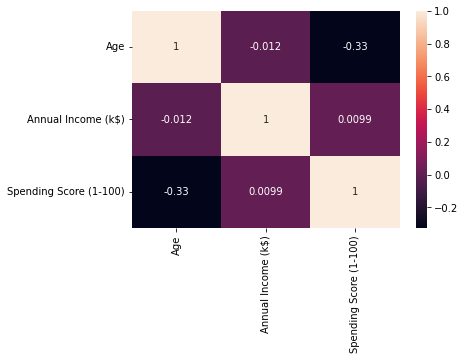

In [10]:
sns.heatmap(df1.corr(),annot=True)

In [11]:
from sklearn import preprocessing

In [12]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:

enc_gend=preprocessing.LabelEncoder().fit_transform(df1.loc[: ,'Gender'])

In [14]:
type(enc_gend)

numpy.ndarray

In [15]:
print(enc_gend)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [16]:
gender=pd.DataFrame(data=enc_gend, columns=["new_gender"])

In [17]:
gender

,new_gender
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [18]:
df1["Gender"] = gender

In [19]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [48]:
X = df1

In [49]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## k-means

In [50]:
from sklearn.cluster import KMeans


In [24]:
import matplotlib.pyplot as plt

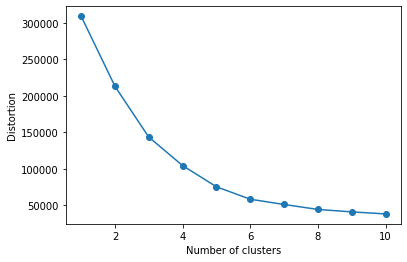

In [55]:
mylist = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random', random_state=0 )
    km.fit(X)
    mylist.append(km.inertia_)

# plot
plt.plot(range(1, 11), mylist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

##  Inertia

Inertia is Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.

In [56]:
no_of_clusters = range(2,10)
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=0)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 212889.44245524297
The innertia for : 3 Clusters is: 143391.5923603568
The innertia for : 4 Clusters is: 104414.67534220166
The innertia for : 5 Clusters is: 75399.61541401484
The innertia for : 6 Clusters is: 58348.64136331505
The innertia for : 7 Clusters is: 51132.70321257689
The innertia for : 8 Clusters is: 44392.11566567936
The innertia for : 9 Clusters is: 41000.874221320715


In [ ]:
import numpy as np

In [57]:
kmeans = KMeans(n_clusters=3, random_state=43)
kmeans = kmeans.fit(X)
predictions = kmeans.predict(X)

# calculating the Counts of the cluster
unique, prediction_count = np.unique(predictions, return_counts=True)
counts = prediction_count.reshape(1,3)

# Creating a dataframe
counts_df1 = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
The Inertia is:  143391.5923603568


In [45]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [44]:
clusters = kmeans.labels_

In [39]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [58]:

df['Clusters'] = clusters

# Creating a cluster Category
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'



df.head(5)

C:\Users\ngugi\AppData\Local\Temp\ipykernel_14740\49891857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
C:\Users\ngugi\AppData\Local\Temp\ipykernel_14740\49891857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
C:\Users\ngugi\AppData\Local\Temp\ipykernel_14740\49891857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Clusters Category
0,1,Male,19,15,39,0,Cluster 1
1,2,Male,21,15,81,0,Cluster 1
2,3,Female,20,16,6,0,Cluster 1
3,4,Female,23,16,77,0,Cluster 1
4,5,Female,31,17,40,0,Cluster 1


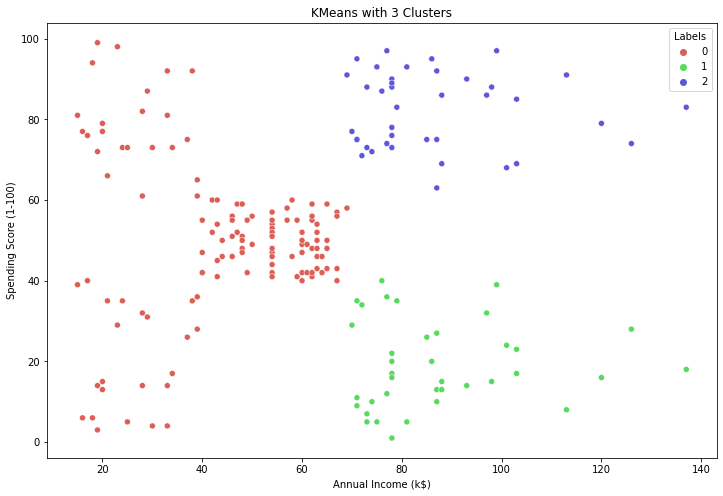

In [59]:


X['Labels'] = kmeans.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data= X, x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

### Conclusion

Label 0 is mid income and mid spending

Label 1 is high income and high spending

Label 2 is low income and low spending

Label 3 is high income and low spending

Label 4 is low income and high spending

## What next after customer segmenting?

https://contensis.uwaterloo.ca/sites/courses-archive/1191/ECON-344-ARBUS-302/lecture-content/module-2/week-6-2.aspx

In [ ]:
df.to_csv('Cluster_Output.csv')

In [44]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Clusters Category
163,164,Female,31,81,93,1,Cluster 2
108,109,Male,68,63,43,2,Cluster 3
155,156,Female,27,78,89,1,Cluster 2
21,22,Male,25,24,73,2,Cluster 3
136,137,Female,44,73,7,0,Cluster 1
53,54,Male,59,43,60,2,Cluster 3
86,87,Female,55,57,58,2,Cluster 3
112,113,Female,38,64,42,2,Cluster 3
23,24,Male,31,25,73,2,Cluster 3
55,56,Male,47,43,41,2,Cluster 3


In [47]:
print (range(1,30))

range(1, 30)
